Is there a relationship between total_call_minutes and total_call_minutes_ios?

Simple linear regression is a statistical method that allows us to summarize and study relationships between two continuous (quantitative) variables: One variable, denoted x, is regarded as the predictor, explanatory, or independent variable.
x is total_call_minutes_ios(feature)
y is total_call_minutes(response)

In [29]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import math
import statsmodels.formula.api as smf

In [30]:
data_path3 = "C:/Users/Anusha/Documents/Copied on 9_26_19/Fall 2019/Data Science/Project/GoogleMeet.csv"
df = pd.read_csv(data_path3)

In [31]:
lm = smf.ols(formula='total_call_minutes ~ total_call_minutes_ios', data=df).fit()
lm.params

Intercept                 816.809365
total_call_minutes_ios      5.612873
dtype: float64

Interpreting Model Coefficients
How do we interpret the total_call_minutes_ios coefficient ( 𝛽1 )?
A "unit" increase in total_call_minutes_ios is associated with a 5.612873 "unit" increase in total_call_minutes.

Using the Model for Prediction
Let's say that UNCG is purchasing 10000 licenses for iOS devices. We can predict the number of call minutes which are made especially using iOS devices

𝑦=𝛽0+𝛽1𝑥
 
𝑦=816.809365+5.612873×10

In [33]:
816.809365+5.612873*10

872.938095

Thus, we would predict total call minutes of 872.938095 in UNCG.

Using Statsmodels to make the prediction:

In [34]:
# you have to create a DataFrame since the Statsmodels formula interface expects it
X_new = pd.DataFrame({'total_call_minutes_ios': [10]})
X_new.head()

,total_call_minutes_ios
0,10


In [35]:
# use the model to make predictions on a new value
lm.predict(X_new)

0    872.938095
dtype: float64

Plotting the Least Squares Line

Let's make predictions for the smallest and largest observed values of x, and then use the predicted values to plot the least squares line:

In [36]:
X_new = pd.DataFrame({'total_call_minutes_ios': [df.total_call_minutes_ios.min(), df.total_call_minutes_ios.max()]})
X_new.head()

,total_call_minutes_ios
0,0
1,1534


In [37]:
preds = lm.predict(X_new)
preds

0     816.809365
1    9426.956532
dtype: float64

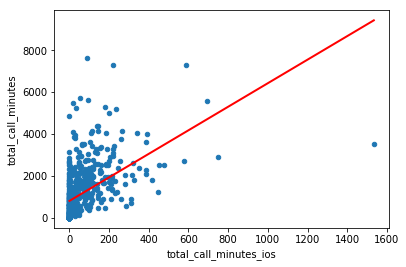

In [38]:
# first, plot the observed data
df.plot(kind='scatter', x='total_call_minutes_ios', y='total_call_minutes')

# then, plot the least squares line
plt.plot(X_new, preds, c='red', linewidth=2)

In [39]:
# print the confidence intervals for the model coefficients
lm.conf_int()

,0,1
Intercept,710.180460,923.438270
total_call_minutes_ios,4.802785,6.422961


As it relates to model coefficients, here is the conventional hypothesis test:

null hypothesis: There is no relationship between total_call_minutes_ios and total_call_minutes (and thus  𝛽1  equals zero)
alternative hypothesis: There is a relationship between total_call_minutes_ios and total_call_minutes (and thus  𝛽1  is not equal to zero)
How do we test this hypothesis? Intuitively, we reject the null (and thus believe the alternative) if the 95% confidence interval does not include zero. Conversely, the p-value represents the probability that the coefficient is actually zero:

In [40]:
# print the p-values for the model coefficients
lm.pvalues

Intercept                 5.311861e-43
total_call_minutes_ios    1.723082e-36
dtype: float64

In this case, the p-value for total_call_minutes_ios is far less than 0.05, we reject the null hypothesis and so we believe that there is a relationship between total_call_minutes_ios and total_call_minutes.

How Well Does the Model Fit the data?
The most common way to evaluate the overall fit of a linear model is by the R-squared value.


R-squared is the proportion of variance explained, meaning the proportion of variance in the observed data that is explained by the model, or the reduction in error over the null model.
The null model just predicts the mean of the observed response, and thus it has an intercept and no slope.

R-squared is between 0 and 1, and higher is better because it means that more variance is explained by the model.

In [41]:
# print the R-squared value for the model
lm.rsquared

0.25507273021955723

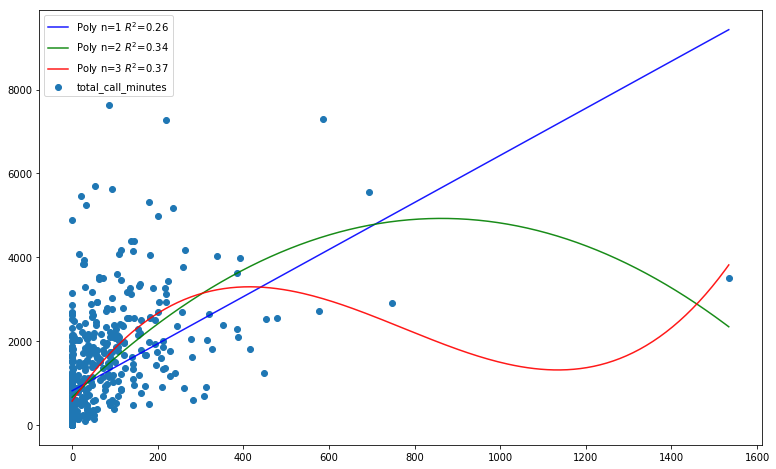

In [42]:
plt.figure(figsize=(8 * 1.618, 8))

plt.scatter(df.total_call_minutes_ios, df.total_call_minutes)

df1 = df

poly_1 = smf.ols(formula='total_call_minutes ~ 1 + total_call_minutes_ios', data=df).fit()

x = pd.DataFrame({'total_call_minutes_ios': np.linspace(df.total_call_minutes_ios.min(), df.total_call_minutes_ios.max(), 200)})


plt.plot(x.total_call_minutes_ios, poly_1.predict(x), 'b-', label='Poly n=1 $R^2$=%.2f' % poly_1.rsquared, alpha=0.9)

# 2-nd order polynomial
poly_2 = smf.ols(formula='total_call_minutes ~ 1 + total_call_minutes_ios + I(total_call_minutes_ios ** 2.0)', data=df).fit()
plt.plot(x.total_call_minutes_ios, poly_2.predict(x), 'g-', label='Poly n=2 $R^2$=%.2f' % poly_2.rsquared, alpha=0.9)

# 3-rd order polynomial
poly_3 = smf.ols(formula='total_call_minutes ~ 1 + total_call_minutes_ios + I(total_call_minutes_ios ** 2.0) + I(total_call_minutes_ios ** 3.0)', data=df).fit()
plt.plot(x.total_call_minutes_ios, poly_3.predict(x), 'r-', alpha=0.9, label='Poly n=3 $R^2$=%.2f' % poly_3.rsquared)

plt.legend()

Multiple Linear Regression
Simple linear regression can easily be extended to include multiple features.

This is called multiple linear regression:

In [43]:
# create a fitted model with all five features
lm = smf.ols(formula='total_call_minutes ~ total_call_minutes_ios + total_call_minutes_android + total_call_minutes_jamboard', data=df).fit()

In [44]:
# print the coefficients
lm.params

Intercept                      766.546506
total_call_minutes_ios           5.438388
total_call_minutes_android       1.833887
total_call_minutes_jamboard     24.503599
dtype: float64

In [45]:
# print a summary of the fitted model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     total_call_minutes   R-squared:                       0.299
Model:                            OLS   Adj. R-squared:                  0.296
Method:                 Least Squares   F-statistic:                     76.80
Date:                Fri, 15 Nov 2019   Prob (F-statistic):           2.26e-41
Time:                        20:00:06   Log-Likelihood:                -4570.4
No. Observations:                 543   AIC:                             9149.
Df Residuals:                     539   BIC:                             9166.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                     766.5465     53.448     14.342      0.000     661.555     871.538
total_call_minutes_ios          5.4384      0.402     13.530      0.000       4.649       6.228
total_call_minutes_android      1.8339      0.344      5.329      0.000       1.158       2.510
total_call_minutes_jamboard    24.5036     10.487      2.337      0.020       3.903      45.104
==============================================================================
Omnibus:                      187.705   Durbin-Watson:                   1.318
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              916.040
Skew:                           1.461   Prob(JB):                    1.21e-199
Kurtosis:                       8.652   Cond. No.                         168.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

What are a few key things we learn from this output?

total_call_minutes_ios, total_call_minutes_android and total_call_minutes_jamboard have significant p-values.
Thus we reject the null hypothesis for all of them (that there is no association between those features and total_call_minutes).

total_call_minutes_ios, total_call_minutes_android and total_call_minutes_jamboard are positively associated with total_call_minutes.
This model has a higher R-squared (0.299) than the previous model(0.25507273021955723), which means that this model provides a better fit to the data than a model that only includes total_call_minutes_ios.

In [46]:
# only include TV and Radio in the model
lm = smf.ols(formula='total_call_minutes ~ total_call_minutes_ios', data=df).fit()
lm.rsquared

0.25507273021955723

In [47]:
# only include TV and Radio in the model
lm = smf.ols(formula='total_call_minutes ~ total_call_minutes_ios + total_call_minutes_android', data=df).fit()
lm.rsquared

0.29235942484123034

In [48]:
lm = smf.ols(formula='total_call_minutes ~ total_call_minutes_ios + total_call_minutes_android+total_call_minutes_jamboard', data=df).fit()
lm.rsquared

0.2994553613448113